In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from project_lib import Project

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
df_data_1.head()


,id,loan_amount,term,grade,home_ownership,annual_inc,issue_date,loan_status,due_date,Gender
0,54734,25000,36 months,B,RENT,85000,8/9/2020,Fully Paid,10/11/2020,Male
1,55742,7000,36 months,B,RENT,65000,5/8/2020,Fully Paid,6/11/2020,Female
2,57245,1200,36 months,C,OWN,54000,3/10/2020,Fully Paid,3/13/2020,Female
3,57416,10800,36 months,C,RENT,32000,11/9/2020,Fully Paid,11/12/2020,Female
4,58915,7500,36 months,B,RENT,85000,4/8/2020,Fully Paid,4/11/2020,Male


In [4]:
df_sr = df_data_1

In [5]:
df_sr.shape

(349, 10)

In [6]:
df_sr['issue_date'] = pd.to_datetime(df_sr['issue_date'])
df_sr['due_date'] = pd.to_datetime(df_sr['due_date'])
df_sr.head()

,id,loan_amount,term,grade,home_ownership,annual_inc,issue_date,loan_status,due_date,Gender
0,54734,25000,36 months,B,RENT,85000,2020-08-09,Fully Paid,2020-10-11,Male
1,55742,7000,36 months,B,RENT,65000,2020-05-08,Fully Paid,2020-06-11,Female
2,57245,1200,36 months,C,OWN,54000,2020-03-10,Fully Paid,2020-03-13,Female
3,57416,10800,36 months,C,RENT,32000,2020-11-09,Fully Paid,2020-11-12,Female
4,58915,7500,36 months,B,RENT,85000,2020-04-08,Fully Paid,2020-04-11,Male


In [7]:
df_sr['loan_status'].value_counts()

Fully Paid     288
Charged Off     61
Name: loan_status, dtype: int64

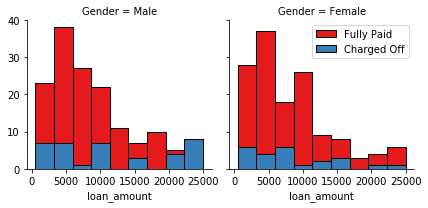

In [8]:
import seaborn as sns

bins = np.linspace(df_sr.loan_amount.min(), df_sr.loan_amount.max(), 10)
g = sns.FacetGrid(df_sr, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'loan_amount', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

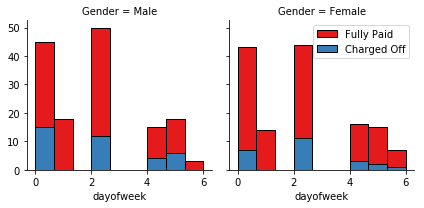

In [9]:
df_sr['dayofweek'] = df_sr['issue_date'].dt.dayofweek
bins = np.linspace(df_sr.dayofweek.min(), df_sr.dayofweek.max(), 10)
g = sns.FacetGrid(df_sr, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [10]:
df_sr.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
Female  Fully Paid     0.852761
        Charged Off    0.147239
Male    Fully Paid     0.801075
        Charged Off    0.198925
Name: loan_status, dtype: float64

In [11]:
df_sr['Gender'].replace(to_replace=['Male','Female'], value=[0,1], inplace=True)
df_sr.head()

,id,loan_amount,term,grade,home_ownership,annual_inc,issue_date,loan_status,due_date,Gender,dayofweek
0,54734,25000,36 months,B,RENT,85000,2020-08-09,Fully Paid,2020-10-11,0,6
1,55742,7000,36 months,B,RENT,65000,2020-05-08,Fully Paid,2020-06-11,1,4
2,57245,1200,36 months,C,OWN,54000,2020-03-10,Fully Paid,2020-03-13,1,1
3,57416,10800,36 months,C,RENT,32000,2020-11-09,Fully Paid,2020-11-12,1,0
4,58915,7500,36 months,B,RENT,85000,2020-04-08,Fully Paid,2020-04-11,0,2


In [12]:
df_sr.groupby(['home_ownership'])['loan_status'].value_counts(normalize=True)

home_ownership  loan_status
MORTGAGE        Fully Paid     0.778626
                Charged Off    0.221374
NONE            Fully Paid     1.000000
OWN             Fully Paid     0.857143
                Charged Off    0.142857
RENT            Fully Paid     0.851064
                Charged Off    0.148936
Name: loan_status, dtype: float64

In [13]:
df_sr.groupby(['grade'])['loan_status'].value_counts(normalize=True)

grade  loan_status
A      Fully Paid     0.963855
       Charged Off    0.036145
B      Fully Paid     0.858696
       Charged Off    0.141304
C      Fully Paid     0.824176
       Charged Off    0.175824
D      Fully Paid     0.642857
       Charged Off    0.357143
E      Fully Paid     0.631579
       Charged Off    0.368421
F      Fully Paid     0.750000
       Charged Off    0.250000
Name: loan_status, dtype: float64

In [27]:
Feature = df_sr[['loan_amount','Gender','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df_sr['grade'])], axis=1)
Feature.head()

,loan_amount,Gender,dayofweek,A,B,C,D,E,F
0,25000,0,6,0,1,0,0,0,0
1,7000,1,4,0,1,0,0,0,0
2,1200,1,1,0,0,1,0,0,0
3,10800,1,0,0,0,1,0,0,0
4,7500,0,2,0,1,0,0,0,0


In [28]:
X = Feature
X[0:5]

,loan_amount,Gender,dayofweek,A,B,C,D,E,F
0,25000,0,6,0,1,0,0,0,0
1,7000,1,4,0,1,0,0,0,0
2,1200,1,1,0,0,1,0,0,0
3,10800,1,0,0,0,1,0,0,0
4,7500,0,2,0,1,0,0,0,0


In [29]:
y = df_sr['loan_status'].values
y[0:5]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid'], dtype=object)

In [30]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 2.56519664, -0.93613252,  2.19988243, -0.55859652,  1.67137017,
        -0.59389661, -0.43717992, -0.23994949, -0.15316792],
       [-0.30151337,  1.06822483,  1.1069871 , -0.55859652,  1.67137017,
        -0.59389661, -0.43717992, -0.23994949, -0.15316792],
       [-1.22523104,  1.06822483, -0.53235589, -0.55859652, -0.5983115 ,
         1.68379477, -0.43717992, -0.23994949, -0.15316792],
       [ 0.30368097,  1.06822483, -1.07880356, -0.55859652, -0.5983115 ,
         1.68379477, -0.43717992, -0.23994949, -0.15316792],
       [-0.22188253, -0.93613252,  0.01409177, -0.55859652,  1.67137017,
        -0.59389661, -0.43717992, -0.23994949, -0.15316792]])

## KNN

In [39]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [40]:
seed=50
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=seed)

In [41]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7785714285714286
2 :  0.6357142857142857
3 :  0.7785714285714286
4 :  0.7571428571428571
5 :  0.8214285714285714
6 :  0.7857142857142857
7 :  0.8142857142857143
8 :  0.8
9 :  0.8214285714285714
10 :  0.7928571428571428
11 :  0.8071428571428572
12 :  0.8071428571428572
13 :  0.8142857142857143
14 :  0.8214285714285714
15 :  0.8285714285714286
16 :  0.8357142857142857
17 :  0.8142857142857143
18 :  0.8071428571428572
19 :  0.8142857142857143
20 :  0.8071428571428572
21 :  0.85
22 :  0.85
23 :  0.85
24 :  0.85
25 :  0.85
26 :  0.85
27 :  0.85
28 :  0.85
29 :  0.85
30 :  0.85
31 :  0.85
32 :  0.85
33 :  0.85
34 :  0.85
35 :  0.85
36 :  0.85
37 :  0.85
38 :  0.85
39 :  0.85
40 :  0.85
41 :  0.85
42 :  0.85
43 :  0.85
44 :  0.85
45 :  0.85
46 :  0.85
47 :  0.85
48 :  0.85
49 :  0.85
50 :  0.85
51 :  0.85
52 :  0.85
53 :  0.85
54 :  0.85
55 :  0.85
56 :  0.85
57 :  0.85
58 :  0.85
59 :  0.85
60 :  0.85
61 :  0.85
62 :  0.85
63 :  0.85
64 :  0.85
65 :  0.85
66 :  0.85
67 :  0.85
68 :  0

In [42]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

21  :  85.0 %


Text(0, 0.5, 'Train Accuracy')

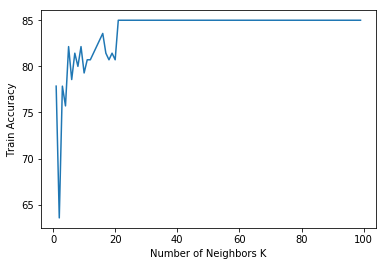

In [43]:
plt.plot(range(1,100),score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [44]:
knn=KNeighborsClassifier(n_neighbors=41,weights='uniform')
knn.fit(X_train,y_train)
predKNN=knn.predict(X_test)
accuracy=metrics.accuracy_score(predKNN,y_test)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  85.0 %


In [45]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test,predKNN))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,predKNN)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,predKNN,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, knn.predict(X_train))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00        21
  Fully Paid       0.85      1.00      0.92       119

   micro avg       0.85      0.85      0.85       140
   macro avg       0.42      0.50      0.46       140
weighted avg       0.72      0.85      0.78       140



Jaccard Similarity Score :  85.0 %


F1-SCORE :  [0.         0.91891892]


Train Accuracy:  80.86124401913875 %


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()

In [52]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8421052631578947
Best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'random_state': 150}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
dtree=DecisionTreeClassifier(max_depth=5,criterion='entropy',max_features=2,random_state=0)

In [54]:
dtree.fit(X_train,y_train)
pred_Dtree=dtree.predict(X_test)

In [55]:
print(classification_report(y_test,pred_Dtree))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_Dtree)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_Dtree,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, dtree.predict(X_train))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.37      0.33      0.35        21
  Fully Paid       0.88      0.90      0.89       119

   micro avg       0.81      0.81      0.81       140
   macro avg       0.63      0.62      0.62       140
weighted avg       0.81      0.81      0.81       140



Jaccard Similarity Score :  81.43 %


F1-SCORE :  [0.35       0.89166667]


Train Accuracy:  85.16746411483254 %


# Support Vector Machine

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
svm=SVC().fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
pred_svm=svm.predict(X_test)

In [59]:
print(classification_report(y_test,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, svm.predict(X_train))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.42      0.38      0.40        21
  Fully Paid       0.89      0.91      0.90       119

   micro avg       0.83      0.83      0.83       140
   macro avg       0.66      0.64      0.65       140
weighted avg       0.82      0.83      0.82       140



Jaccard Similarity Score :  82.86 %


F1-SCORE :  [0.4 0.9]


Train Accuracy:  84.688995215311 %


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lgm=LogisticRegression()

In [62]:
lgm.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
pred_lgm=lgm.predict(X_test)

In [64]:
print(classification_report(y_test,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_lgm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, lgm.predict(X_train))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.11      0.05      0.07        21
  Fully Paid       0.85      0.93      0.89       119

   micro avg       0.80      0.80      0.80       140
   macro avg       0.48      0.49      0.48       140
weighted avg       0.74      0.80      0.76       140



Jaccard Similarity Score :  80.0 %


F1-SCORE :  [0.06666667 0.888     ]


Train Accuracy:  81.3397129186603 %


# Model Evaluation using Test set

In [65]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [67]:
test_df = df_data_1
test_df.head()

,id,loan_amount,term,grade,home_ownership,annual_inc,issue_date,loan_status,due_date,Gender,dayofweek
0,54734,25000,36 months,B,RENT,85000,2020-08-09,Fully Paid,2020-10-11,0,6
1,55742,7000,36 months,B,RENT,65000,2020-05-08,Fully Paid,2020-06-11,1,4
2,57245,1200,36 months,C,OWN,54000,2020-03-10,Fully Paid,2020-03-13,1,1
3,57416,10800,36 months,C,RENT,32000,2020-11-09,Fully Paid,2020-11-12,1,0
4,58915,7500,36 months,B,RENT,85000,2020-04-08,Fully Paid,2020-04-11,0,2


In [68]:
test_df['issue_date'] = pd.to_datetime(test_df['issue_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df.head()

,id,loan_amount,term,grade,home_ownership,annual_inc,issue_date,loan_status,due_date,Gender,dayofweek
0,54734,25000,36 months,B,RENT,85000,2020-08-09,Fully Paid,2020-10-11,0,6
1,55742,7000,36 months,B,RENT,65000,2020-05-08,Fully Paid,2020-06-11,1,4
2,57245,1200,36 months,C,OWN,54000,2020-03-10,Fully Paid,2020-03-13,1,1
3,57416,10800,36 months,C,RENT,32000,2020-11-09,Fully Paid,2020-11-12,1,0
4,58915,7500,36 months,B,RENT,85000,2020-04-08,Fully Paid,2020-04-11,0,2


In [69]:
test_df['dayofweek'] = test_df['issue_date'].dt.dayofweek
test_df.head()

,id,loan_amount,term,grade,home_ownership,annual_inc,issue_date,loan_status,due_date,Gender,dayofweek
0,54734,25000,36 months,B,RENT,85000,2020-08-09,Fully Paid,2020-10-11,0,6
1,55742,7000,36 months,B,RENT,65000,2020-05-08,Fully Paid,2020-06-11,1,4
2,57245,1200,36 months,C,OWN,54000,2020-03-10,Fully Paid,2020-03-13,1,1
3,57416,10800,36 months,C,RENT,32000,2020-11-09,Fully Paid,2020-11-12,1,0
4,58915,7500,36 months,B,RENT,85000,2020-04-08,Fully Paid,2020-04-11,0,2


In [70]:
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

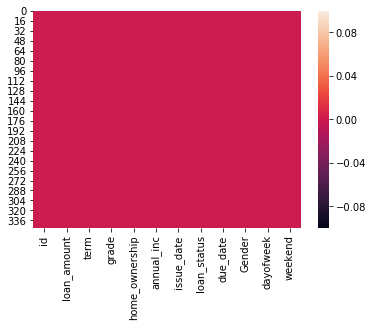

In [71]:
sns.heatmap(test_df.isnull())

In [82]:
test_df = df_sr
test_df.head()

,id,loan_amount,term,grade,home_ownership,annual_inc,issue_date,loan_status,due_date,Gender,dayofweek,weekend
0,54734,25000,36 months,B,RENT,85000,2020-08-09,Fully Paid,2020-10-11,0,6,1
1,55742,7000,36 months,B,RENT,65000,2020-05-08,Fully Paid,2020-06-11,1,4,1
2,57245,1200,36 months,C,OWN,54000,2020-03-10,Fully Paid,2020-03-13,1,1,0
3,57416,10800,36 months,C,RENT,32000,2020-11-09,Fully Paid,2020-11-12,1,0,0
4,58915,7500,36 months,B,RENT,85000,2020-04-08,Fully Paid,2020-04-11,0,2,0


In [83]:
dumm=pd.get_dummies(test_df['grade'])
#dumm=dumm.drop('Master or Above',axis=1,inplace=True)
dumm=dumm[['A','B','C', 'D', 'E', 'F']]

In [98]:
test_feature = test_df[['loan_amount','annual_inc','weekend']]
test_feature = pd.concat([test_feature,dumm], axis=1)
#test_feature = pd.concat([test_feature,pd.get_dummies(df_sr['term'])], axis=1)
#test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,loan_amount,annual_inc,weekend,A,B,C,D,E,F
0,25000,85000,1,0,1,0,0,0,0
1,7000,65000,1,0,1,0,0,0,0
2,1200,54000,0,0,0,1,0,0,0
3,10800,32000,0,0,0,1,0,0,0
4,7500,85000,0,0,1,0,0,0,0


In [99]:
test_data= test_feature
test_data= preprocessing.StandardScaler().fit(test_data).transform(test_data)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [100]:
y_t=test_df['loan_status']
knn=KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [101]:
predKNN_test=knn.predict(test_data)

In [102]:
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  81.69999999999999 %


In [103]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X,y)
    predKNN=knn.predict(test_data)
    accuracy=metrics.accuracy_score(predKNN,y_t)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.830945558739255
2 :  0.7736389684813754
3 :  0.8252148997134671
4 :  0.8194842406876791
5 :  0.8166189111747851
6 :  0.8252148997134671
7 :  0.833810888252149
8 :  0.828080229226361
9 :  0.8166189111747851
10 :  0.830945558739255
11 :  0.8252148997134671
12 :  0.830945558739255
13 :  0.828080229226361
14 :  0.8194842406876791
15 :  0.8194842406876791
16 :  0.8166189111747851
17 :  0.8194842406876791
18 :  0.8194842406876791
19 :  0.8194842406876791
20 :  0.8194842406876791
21 :  0.8080229226361032
22 :  0.8108882521489972
23 :  0.8137535816618912
24 :  0.8137535816618912
25 :  0.8166189111747851
26 :  0.8108882521489972
27 :  0.8166189111747851
28 :  0.8166189111747851
29 :  0.8223495702005731
30 :  0.8166189111747851
31 :  0.8223495702005731
32 :  0.8223495702005731
33 :  0.8223495702005731
34 :  0.8223495702005731
35 :  0.8252148997134671
36 :  0.8252148997134671
37 :  0.8252148997134671
38 :  0.8252148997134671
39 :  0.8252148997134671
40 :  0.8252148997134671
41 :  0.8252148

In [104]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

7  :  83.38 %


In [105]:
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  82.19999999999999 %


In [106]:
print(classification_report(y_t,predKNN_test))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,predKNN_test)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,predKNN_test,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y,knn.predict(X))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.33      0.02      0.03        61
  Fully Paid       0.83      0.99      0.90       288

   micro avg       0.82      0.82      0.82       349
   macro avg       0.58      0.50      0.47       349
weighted avg       0.74      0.82      0.75       349



Jaccard Similarity Score :  82.23 %


F1-SCORE :  [0.03125   0.9022082]


Train Accuracy:  81.66189111747852 %


In [107]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X, y)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.833810888252149
Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'random_state': 15}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [108]:
dtree=DecisionTreeClassifier(max_depth=6,criterion='entropy',max_features=4,random_state=20).fit(X,y)
pred_Dtree=dtree.predict(test_data)

In [109]:
print(classification_report(y_t,pred_Dtree))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_Dtree)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_Dtree,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, dtree.predict(X))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.47      0.28      0.35        61
  Fully Paid       0.86      0.93      0.90       288

   micro avg       0.82      0.82      0.82       349
   macro avg       0.67      0.61      0.62       349
weighted avg       0.79      0.82      0.80       349



Jaccard Similarity Score :  81.95 %


F1-SCORE :  [0.35051546 0.89517471]


Train Accuracy:  85.38681948424069 %


# SVM

In [110]:
svm=SVC().fit(X,y)
pred_svm=svm.predict(test_data)

In [111]:
print(classification_report(y_t,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, svm.predict(X))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.75      0.05      0.09        61
  Fully Paid       0.83      1.00      0.91       288

   micro avg       0.83      0.83      0.83       349
   macro avg       0.79      0.52      0.50       349
weighted avg       0.82      0.83      0.76       349



Jaccard Similarity Score :  83.09 %


F1-SCORE :  [0.09230769 0.90679305]


Train Accuracy:  84.2406876790831 %


# LOGISTIC REGRESSION

In [112]:
lgm=LogisticRegression().fit(X,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
pred_lgm=lgm.predict(test_data)

In [114]:
print(classification_report(y_t,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_lgm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, lgm.predict(X))*100,'%')

              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00        61
  Fully Paid       0.83      1.00      0.90       288

   micro avg       0.83      0.83      0.83       349
   macro avg       0.41      0.50      0.45       349
weighted avg       0.68      0.83      0.75       349



Jaccard Similarity Score :  82.52 %


F1-SCORE :  [0.         0.90423862]


Train Accuracy:  82.52148997134671 %


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

In [115]:

Algoritm=['KNN','Decision Tree','SVM','LogisticRegression']
j_knn=round(jaccard_similarity_score(y_t,predKNN_test)*100,2)
j_dtree=round(jaccard_similarity_score(y_t,pred_Dtree)*100,2)
j_svm=round(jaccard_similarity_score(y_t,pred_svm)*100,2)
j_lgm=round(jaccard_similarity_score(y_t,pred_lgm)*100,2)
Jaccard=[j_knn,j_dtree,j_svm,j_lgm]

f1_knn=f1_score(y_t,predKNN_test,average=None)
f1_dtree=f1_score(y_t,pred_Dtree,average=None)
f1_svm=f1_score(y_t,pred_svm,average=None)
f1_lgm=f1_score(y_t,pred_lgm,average=None)
F1_score=[f1_knn,f1_dtree,f1_svm,f1_lgm]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
table = pd.DataFrame({
    "Algorithm": Algoritm,
    "Jaccatd": Jaccard,
    "F1-Score": F1_score,
    "LogLoss":[np.NAN,np.NAN,np.NAN,np.NAN]})

In [117]:

table

,Algorithm,Jaccatd,F1-Score,LogLoss
0,KNN,82.23,"[0.03125, 0.9022082018927445]",NaN
1,Decision Tree,81.95,"[0.35051546391752575, 0.8951747088186356]",NaN
2,SVM,83.09,"[0.0923076923076923, 0.9067930489731437]",NaN
3,LogisticRegression,82.52,"[0.0, 0.9042386185243327]",NaN
